<h3>Exploratory Data Analysis</h3>

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list
)

c:\Users\DELL\anaconda3\envs\data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


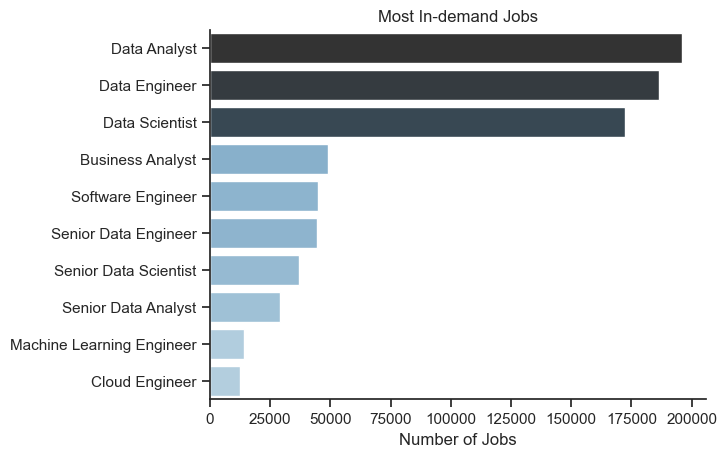

In [2]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='Blues_d', legend=False)
sns.despine()
plt.title('Most In-demand Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

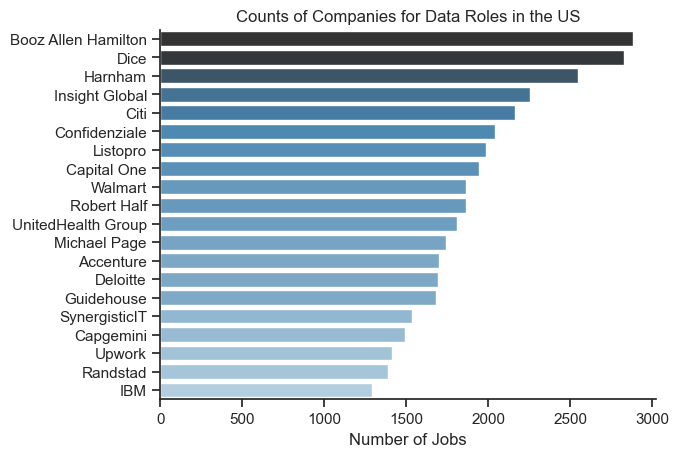

In [12]:
df_plot_company = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_company, x='count', y='company_name', hue='count', palette='Blues_d', legend=False)
plt.title('Counts of Companies for Data Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

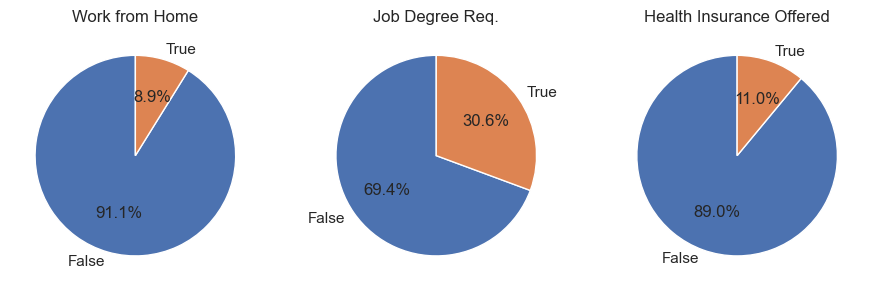

In [15]:
fig, ax = plt.subplots(1,3, figsize=(11, 3.5))

dict_column = {
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

<h4>Filter for US Data roles</h4>

In [4]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_dt_us = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))]

<h4>US analysis --></h4>

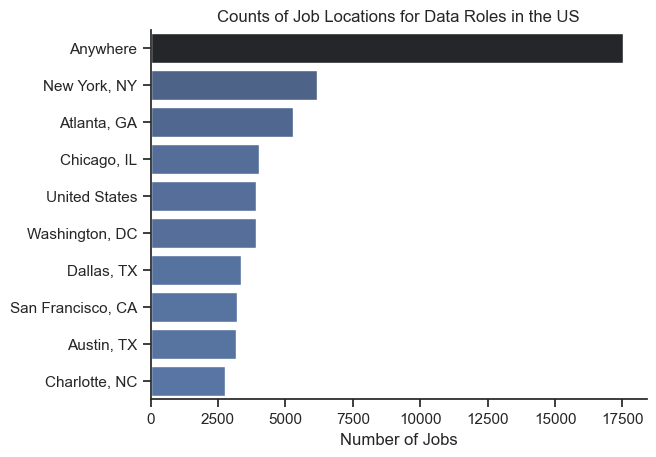

In [5]:
df_us_plot = df_dt_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Job Locations for Data Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

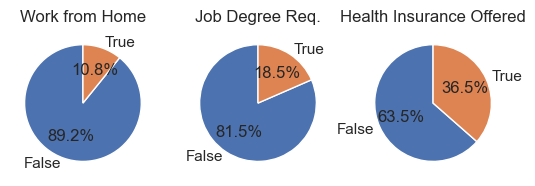

In [6]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_dt_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

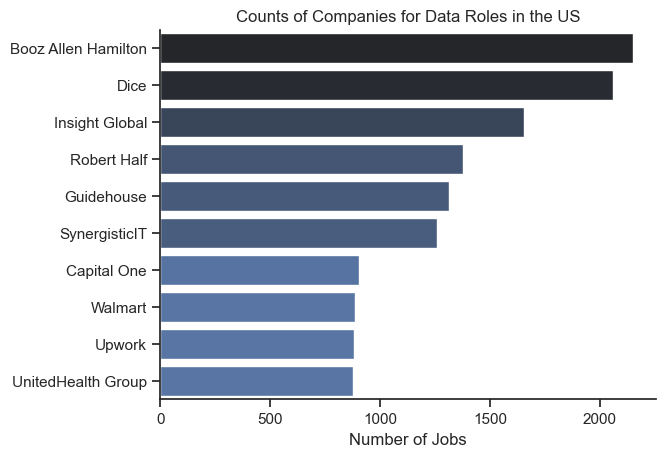

In [7]:
df_us_plot = df_dt_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Companies for Data Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

<h4>Filter for BD Data roles</h4>

In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_dt_bd = df[(df['job_country'] == 'Bangladesh') & (df['job_title_short'].isin(job_titles))]

<h4>BD analysis --></h4>

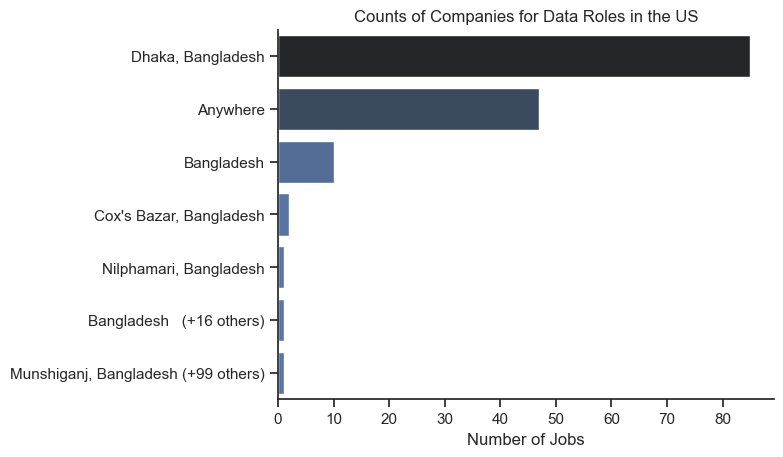

In [9]:
df_bd_plot = df_dt_bd['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_bd_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Companies for Data Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

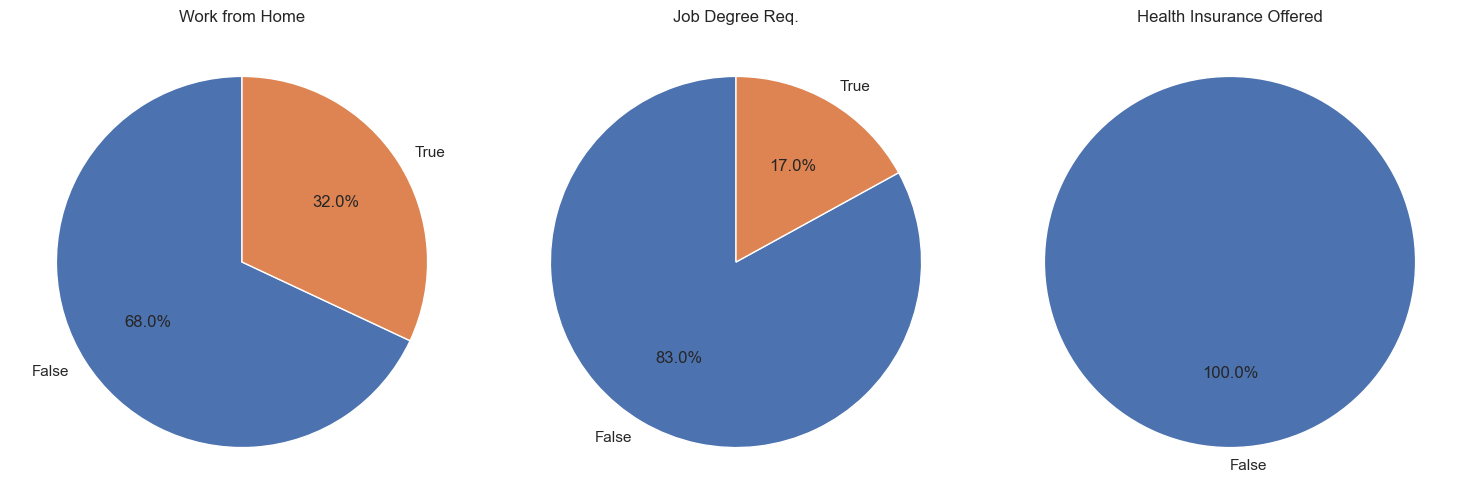

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

dict_column = {
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_dt_bd[column].value_counts().sort_index()
    ax[i].pie(
        value_counts,
        startangle=90,
        autopct='%1.1f%%',
        labels=value_counts.index.map({False: 'False', True: 'True'})
    )
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


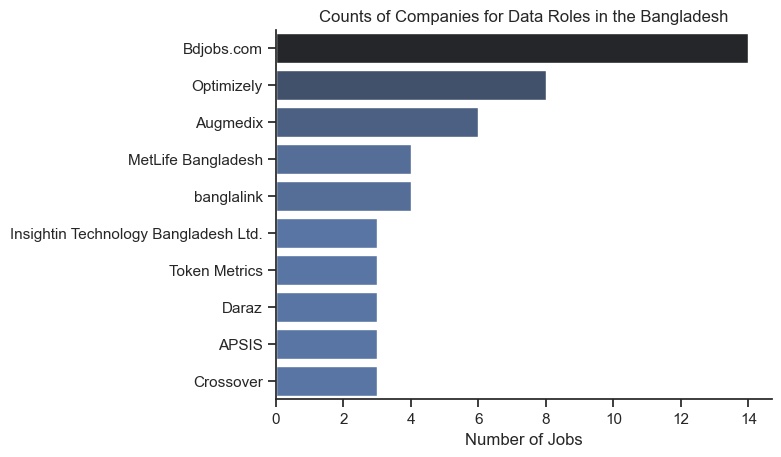

In [11]:
df_us_plot = df_dt_bd['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_us_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Companies for Data Roles in the Bangladesh')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()